## Additional Exercises IV -  Feature Scales


In [1]:
%load_ext lab_black

In [2]:
# First, let's import all the needed libraries.
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


$$\log {_2}{64} = 6 $$ 
$$\log {_{10}}{1000} =  3 $$ 
$$\log {_3}{27} = 3 $$ 

$$9^{0.5} = 3$$
$$64^\frac{1}{6} = 2$$
$$8^0 = 1$$

$$\log{\frac{a}{b}}    $$ 
$$2 * \log{{b}}    $$ 
$$\frac{1}{3}    $$ 

### 1. An Arbitrary Example
[Inspired by Soga FU Berlin](https://www.geo.fu-berlin.de/en/v/soga-r/Advances-statistics/Feature-scales/real_world_challenges/index.html)

Take a closer look at this hypothetical example of a survey among students. In this survey, students were asked how important they consider practice exercises to be for their own learning success. 1 is not important at all and 10 is extremely important. A total of 254 students were surveyed. 
After the analysis, the following results are presented in %:


In [3]:
## poll results as dictionary
poll = {
    "score": np.arange(1, 11, 1),
    "percent": [1, 0.2, 0, 3, 7, 8, 20, 32, 16.4, 12],
}

## convert to pandas
poll = pd.DataFrame(poll)
print(poll)

   score  percent
0      1      1.0
1      2      0.2
2      3      0.0
3      4      3.0
4      5      7.0
5      6      8.0
6      7     20.0
7      8     32.0
8      9     16.4
9     10     12.0


#### 1.1. Calculate the mean and Plotting

Plot the data as a bar plot and calculate the mean of the survey results. Do you notice anything unusual about the data and the statistical parameters?
Reconstruct the data and calculate the mean!


##### solution

In [4]:
## reconstructing the data
n = 254
absolute_votes = round(
    poll.percent / 100 * n
)  # convert percentage to abosulte numbers and round to have full people --> induces uncertainty

## no a small loop
poll_raw = []
for x, c in zip(poll.score, absolute_votes):
    interim = np.repeat(x, c)
    poll_raw.extend(interim)
poll_raw = np.array(poll_raw)

# get the mean

mean = np.mean(poll_raw)
mean

7.5984251968503935

We have  a second option here to calculate the mean: 

1.  The weighted mean (since we are dealing with percentage data here).
$$ 
\bar x_w = \frac{\sum_{i=1}^n w_ix_i
}{\sum_{i=1}^n w_i}
$$

wi = weights (percentages) , xi = scores

In [5]:
weighted_mean = sum(poll["score"] * poll["percent"]) / sum(poll["percent"])
weighted_mean

## is slightly different because of our prior rounding --> but very similar

7.630522088353414

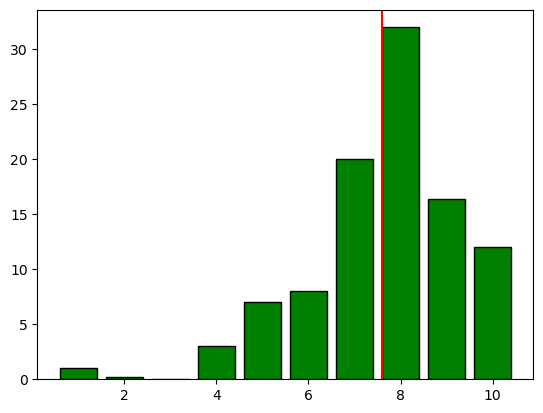

In [6]:
plt.bar(poll.score, poll.percent, color="green", edgecolor="black")
plt.axvline(mean, color="red")  ## add the mean to the plot
plt.show()

Have you noticed it already? Lets have a closer look, since the figure contains a lot of information:

1. The absolute majority voted on the upper part of the scale
2. Only 3 individual voted “not important at all” (0 or 1)
3. Nearly one third voted for the third highest value (8)
4. 60% voted for levels ≥8
5. A “Score” reports a value of ~7.6 which is below 8 !!

**Why is the mean as measure of central tendency smaller than the values of 60% of the voters?**

> We can exclude several phenomena for this weird poll outcome as shown [here](https://www.geo.fu-berlin.de/en/v/soga-r/Advances-statistics/Feature-scales/real_world_challenges/index.html)
> 
> What is the reason?

#### 1.2. Noticing the bounds and resolving them 

Calcuting the arithmetic mean seems to be unsufficient here, but why? Lets think about the margins the people were allowed to vote in between. What the upper and the lower bound ?

Ok Ok, may be a bit trivial here, but: 

Choosing one number is related to two information:

* the distance to the lower margin and (0)
* the distance to the upper margin! (10)

Both distances are sum up to the width of the interval. Hereby, neither the margins themselves nor the width of the interval are important. Only the amount of possible eligible numbers influences the resolution of the measure.

Thus, any number reflects a relative measure towards the margins and can therefore be transformed to a standard interval as [0,1] or [0,100%].

However, for a meaningful examination of the constraint values, we should focus on the relation of both equal important measures, e.g. for [0,1].

In our case, we applay logistic transformation resp. logit, as we already saw in the seminar (sea ice example):

$$
x\to x'=log\left(
\frac{x}{1-x}\right)$$

The back transformation is the “logistic” function resp. inverse logit:
$$
x'
\to x=\frac{e^{x'}}{1+e^{x'}}$$



Nice, we just follow our recipe then! Apply the transformation to our poll data!

##### 1.2.1. Min-Max-Scaling

But before we start we have to enlarge our interval by a small constant c to avoid zeros when the original margin has been voted.
Set a small constant c for min-max-Transformation into the simplex:


The min-max scaling

$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$


transforms the data into the range $[0,1]$. We want to avoid getting values with 0, because in the second step we need the logarithm of the values. Therefore, we use slightly larger boundary values $x_{min}-1$ and $x_{max}+1$. Thus

$$x'=\frac{x-x_{min}+1}{x_{max}-x_{min}+2\, .}$$



##### solution

In [7]:
# set a small constant c to avoid zeros:
c = 0.01
# min-max-transformation
min_max_poll = (poll_raw - (1 - c)) / (10 - 1 + 2 * c)

##### 1.2.2. Perform a logistic transformation on x′∈]0,1[ℝ

$$
x\to x'=log\left(
\frac{x}{1-x}\right)$$

Perform a logistic transformation on x′∈]0,1[ℝ

Plot the data again as histogram, how does the distribution look now?

Then we can calculate the desired parameters agaiin (e.g., mean, median ...)!

##### solution

In [8]:
# logistic transformation
poll_log = np.log(min_max_poll / (1 - min_max_poll))

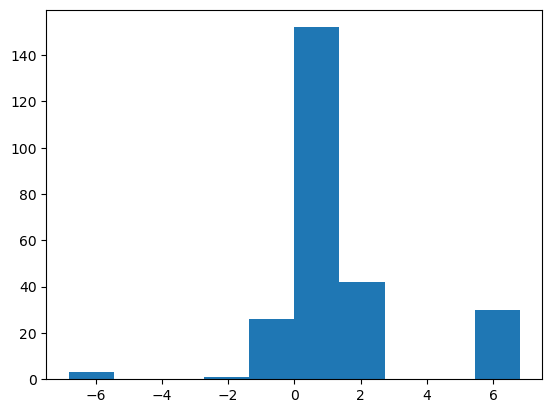

In [9]:
## lets plot again
plt.hist(poll_log)
plt.show()

Looks alot less skewed!

lets calculate the mean again:

In [10]:
m_log = np.mean(poll_log)
med_log = np.median(poll_log)

## and in addition the confidence bounds, this is just an extra here !
CI_low = m_log - np.std(poll_log) / np.sqrt(len(poll_log))
CI_up = m_log + np.std(poll_log) / np.sqrt(len(poll_log))

#### 1.3. Backtransform

Transform these paramters back by applying exponential function. Have we resolved this issue now?

##### solution

In [11]:
corrected_mean = (1 - c) + (9 + 2 * c) * np.exp(m_log) / (1 + np.exp(m_log))
corrected_median = (1 - c) + (9 + 2 * c) * np.exp(med_log) / (1 + np.exp(med_log))
corrected_CI_low = (1 - c) + (9 + 2 * c) * np.exp(CI_low) / (1 + np.exp(CI_low))
corrected_CI_up = (1 - c) + (9 + 2 * c) * np.exp(CI_up) / (1 + np.exp(CI_up))


print(
    f"corrected mean =",
    {round(corrected_mean, 2)},
    "corrected median=",
    {round(corrected_median, 2)},
    "confidence interval=[",
    {round(corrected_CI_low, 2)},
    ",",
    {round(corrected_CI_up, 2)},
    "]",
)

corrected mean = {8.46} corrected median= {8.0} confidence interval=[ {8.28} , {8.63} ]


We not only get a reasonable mean, the confidence bounds are asymmetric as it should be for skewed distributions.
Furthermore, these transformations have not influenced the median! (As it should be!)



### 2. Working with real Data 

#### DWD data

We begin by loading the meteorological data set from the [Deutscher Wetterdienst DWD (German Weather Service) Open Climate Data Center ](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/). You find a documentation of this data in [german](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/BESCHREIBUNG_obsgermany_climate_monthly_kl_historical_de.pdf) and  [english](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/DESCRIPTION_obsgermany_climate_monthly_kl_historical_en.pdf).

We will reuse this data from the prior exercise.

In [12]:
dahlem_clim = pd.read_csv(
    "https://userpage.fu-berlin.de/soga/data/raw-data/NS_TS_Dahlem.txt", sep=";"
)
dahlem_clim.head(10)

,STATIONS_ID,MESS_DATUM_BEGINN,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
0,403,17190101,17190131,5,-999.0,2.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
1,403,17190201,17190228,5,-999.0,1.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
2,403,17190301,17190331,5,-999.0,5.2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
3,403,17190401,17190430,5,-999.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
4,403,17190501,17190531,5,-999.0,15.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
5,403,17190601,17190630,5,-999.0,19.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
6,403,17190701,17190731,5,-999.0,21.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
7,403,17190801,17190831,5,-999.0,18.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
8,403,17190901,17190930,5,-999.0,13.9,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
9,403,17191001,17191031,5,-999.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor


#### 2.1. Subsetting the data frame
First, we want to subset the entire dataset. 
> We only want to keep data from 1961 to today. Subset the entire dataset (not only 1 column as we saw in the seminar)!
> 
> How many rows has the dataframe now?

##### solution

In [13]:
## you could do e.g.,:
dahlem_clim = dahlem_clim.loc[dahlem_clim["MESS_DATUM_BEGINN"] >= 19610101]
dahlem_clim.head(10)

,STATIONS_ID,MESS_DATUM_BEGINN,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
2778,403,19610101,19610131,5,5.01,-1.02,1.31,-3.88,2.63,7.8,-999.0,-16.2,71.5,5,50.4,7.4,eor
2779,403,19610201,19610228,5,6.12,4.66,7.98,1.56,2.56,15.5,-999.0,-4.7,61.4,5,41.9,7.6,eor
2780,403,19610301,19610331,5,5.58,6.79,10.79,3.15,3.02,19.4,-999.0,-3.7,124.1,5,52.9,18.6,eor
2781,403,19610401,19610430,5,4.88,11.38,16.61,6.24,2.40,26.1,-999.0,-0.9,192.7,5,55.7,13.3,eor
2782,403,19610501,19610531,5,6.11,11.23,15.54,7.18,2.29,23.8,-999.0,3.0,132.8,5,120.1,26.7,eor
2783,403,19610601,19610630,5,4.39,17.73,23.18,11.47,2.12,30.4,-999.0,5.5,273.4,5,48.3,13.4,eor
2784,403,19610701,19610731,5,5.79,16.16,20.88,12.14,2.49,33.0,-999.0,8.8,143.2,5,72.6,13.2,eor
2785,403,19610801,19610831,5,5.34,15.97,21.20,11.40,2.40,28.5,-999.0,8.0,169.7,5,43.0,10.3,eor
2786,403,19610901,19610930,5,3.48,15.95,22.00,11.06,2.11,30.0,-999.0,4.4,201.7,5,35.5,12.1,eor
2787,403,19611001,19611031,5,4.77,11.10,15.54,7.26,2.39,22.3,-999.0,3.3,136.8,5,35.7,16.4,eor


In [14]:
dahlem_clim.shape[0]  # number of rows

732

#### 2.2. Checking for Normality
We want to work with the precipitation sum per month in mm now. Its written the the `MO_RR` column.
Plot the distribution as histogram or density plot and a QQ-plot to visually check for normal distribution (solution the same as the prior exercise). Do mean and standard deviation violate the 3-sigma rule?

##### solution

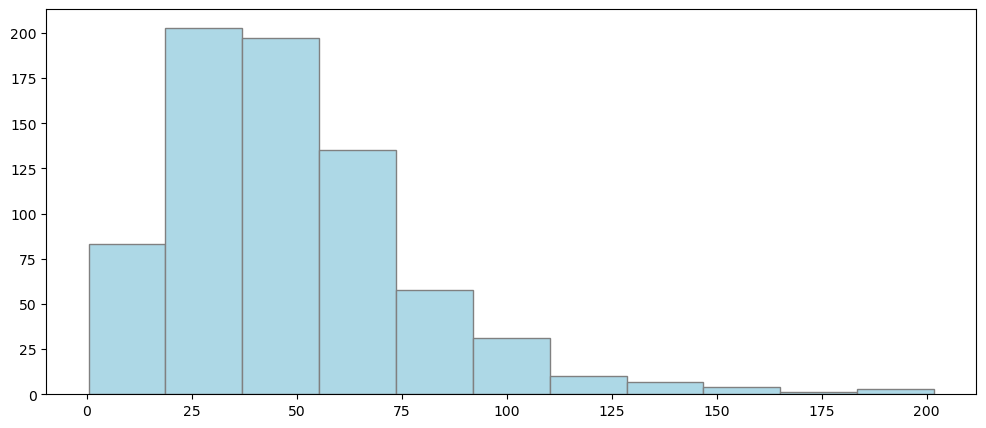

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(dahlem_clim.MO_RR, bins="sturges", color="lightblue", edgecolor="grey")

plt.show()

<Figure size 1200x500 with 0 Axes>

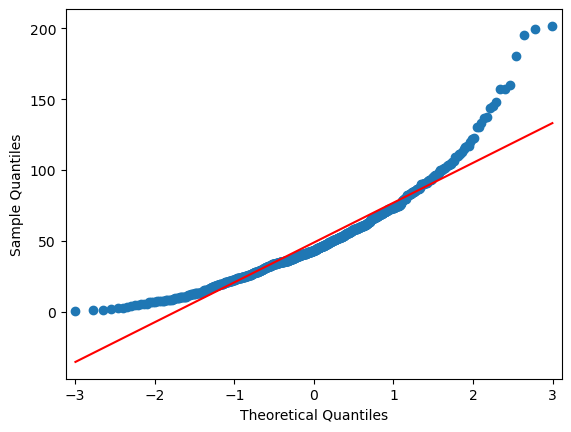

In [16]:
import statsmodels.api as sm

plt.figure(figsize=(12, 5))
sm.qqplot(dahlem_clim.MO_RR, line="r")

plt.show()

Ok, looks skewed! There seems to be no normal distribution.....and 3-sigma is also not fulfilled:

In [17]:
np.mean(dahlem_clim.MO_RR), np.std(dahlem_clim.MO_RR)

(48.77950819672131, 29.232662243364572)

In [18]:
np.median(dahlem_clim.MO_RR)

43.150000000000006

#### 2.3. Transforming the Data

In the prior exercise we saw that the precipitation data is not normally distributed and that calculating the mean and standard deviation violates the 3-sigma rule! Apply the "recipe" we saw in the seminar for double bounded scales (same as exercise above):

1. scale your variable for min-max and log transform your variable
2. Calculate statistics, Plot histogram of log-transformed data (mean and std)
3. Backtransform using exp()

How about the 3-sigma rule now?

##### solution 

1. Min-Max Scaling

In [19]:
dahlem_MO_RR_transfo = (
    dahlem_clim.MO_RR.copy()
)  # set an equivalent copy to perform the feature scales transformation

xmin = dahlem_MO_RR_transfo.min()
xmax = dahlem_MO_RR_transfo.max()

# transform each column by its indiv. min/max
dahlem_MO_RR_transfo = (dahlem_MO_RR_transfo - xmin + 1) / (xmax - xmin + 2)

2. Perform a logistic transformation on x′∈]0,1[ℝ

In [20]:
# Perform a logistic transformation on x′∈]0,1[ℝ

dahlem_MO_RR_transfo = np.log(dahlem_MO_RR_transfo / (1 - dahlem_MO_RR_transfo))

3. Histogram Plotting

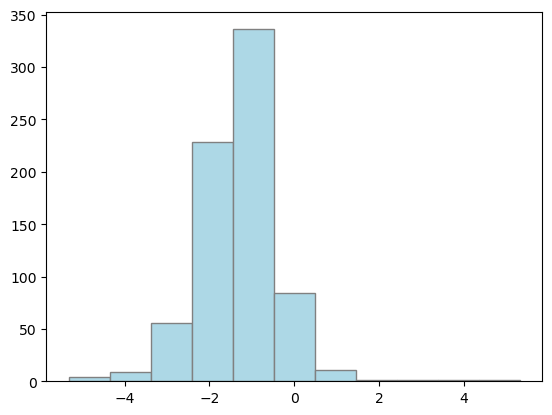

In [21]:
## lets plot again
plt.hist(dahlem_MO_RR_transfo, bins="sturges", color="lightblue", edgecolor="grey")
plt.show()

4. Calculate statistics (e.g., mean and confidence bounds...)

In [22]:
m_log = np.mean(dahlem_MO_RR_transfo)
med_log = np.median(dahlem_MO_RR_transfo)

## and in addition the confidence bounds, this is just an extra here !
CI_low = m_log - np.std(dahlem_MO_RR_transfo) / np.sqrt(len(dahlem_MO_RR_transfo))
CI_up = m_log + np.std(dahlem_MO_RR_transfo) / np.sqrt(len(dahlem_MO_RR_transfo))

5. **Backtransform**: Transform these parameters back by applying exponential function. Have we resolved this issue now?

In [23]:
# backtransform
## reverse min max und perform exp()

corrected_mean = (xmin - 1) + (xmax - xmin + 2) * (np.exp(m_log) / (1 + np.exp(m_log)))
corrected_median = (xmin - 1) + (xmax - xmin + 2) * (
    np.exp(med_log) / (1 + np.exp(med_log))
)
corrected_CI_low = np.exp(CI_low) / (1 + np.exp(CI_low)) * (xmax - xmin + 2) - 1 + xmin
corrected_CI_up = np.exp(CI_up) / (1 + np.exp(CI_up)) * (xmax - xmin + 2) - 1 + xmin


print(
    f"corrected mean =",
    {round(corrected_mean, 2)},
    "corrected median=",
    {round(corrected_median, 2)},
    "confidence interval=[",
    {round(corrected_CI_low, 2)},
    ",",
    {round(corrected_CI_up, 2)},
    "]",
)

corrected mean = {43.06} corrected median= {43.15} confidence interval=[ {41.89} , {44.25} ]


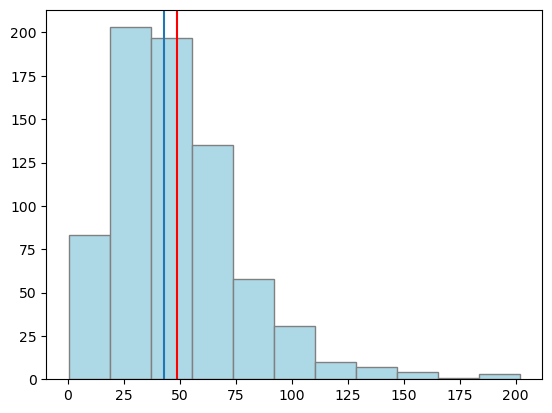

In [24]:
## lets plot again
dahlem_MO_RR_back_transfo = (xmin - 1) + (xmax - xmin + 2) * (
    np.exp(dahlem_MO_RR_transfo) / (1 + np.exp(dahlem_MO_RR_transfo))
)


plt.hist(dahlem_MO_RR_back_transfo, bins="sturges", color="lightblue", edgecolor="grey")
plt.axvline(np.mean(dahlem_clim.MO_RR), color="red")
plt.axvline(corrected_mean)
plt.show()

In [25]:
from IPython.display import IFrame

IFrame(
    src="../../../citation_Marie.html",
    width=900,
    height=200,
)